# 1. Introduction

* In the last mission, we learned how to create bar plots to compare the average user rating a movie received from four movie review sites. We also learned how to create scatter plots to explore how ratings on one site compare with ratings on another site.

* In this mission, we'll learn how to visualize the distributions of user ratings using histograms and box plots. We'll continue working with the same dataset from the last mission. Recall that you can download the dataset fandango_scores.csv from the [FiveThirtEight Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
print(norm_reviews[:5])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  
0       3.90                   4.5  
1       3.55                   4.5  
2       3.90                   4.5  
3       2.70                   4.5  
4       2.55                   3.0  


# 2. Frequency Distribution

* A column's **frequency distribution consists of the unique values in that column along with the count for each of those values** (or their frequency). We can use Series.value_counts() to return the frequency distribution as Series object:

`freq_counts = df['Fandango_Ratingvalue'].value_counts()`

* sort_index(): sort by unique values in ascending order
* value_counts(): sort by frequency in descending order

## TODO:
* Use the value_counts() method to return the frequency counts for the Fandango_Ratingvalue column. Sort the resulting Series object by the index and assign to fandango_distribution.
* Use the value_counts() method to return frequency counts the IMDB_norm column. Sort the resulting Series object by the index and assign to imdb_distribution.
* Use the print() function to display fandango_distribution and imdb_distribution.

In [2]:
fandago_distribution=norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()
fandago_distribution

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [3]:
imdb_distribution=norm_reviews['IMDB_norm'].value_counts().sort_index()
imdb_distribution

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64

# 3. Binning

we can quickly scan the frequency counts and confirm that the Fandango_Ratingvalue column ranges from 2.7 to 4.8 while the IMDB_norm column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:

* What percent of the ratings are contained in the 2.0 to 4.0 range?
  * How does this compare with other sites?
* Which values represent the top 25% of the ratings? The bottom 25%?
  * How does this compare with other sites?

* Comparing frequency distributions is also challenging because the Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. `We need a way to compare frequencies across a shared set of values`. Because all ratings have been normalized to a range of 0 to 5, `we can start by dividing the range of possible values into a series of fixed length intervals, called bins.`

In [4]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/histogram_binning.png')

**The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a histogram.** 

# 4. Histogram In Matplotlib

We can generate a histogram using Axes.hist(). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:

* calculate the minimum and maximum value from the sequence of values we passed in
* create 10 bins of equal length that span the range from the minimum to the maximum value
* group unique values into the bins
* sum up the associated unique values
* generate a bar for the frequency sum for each bin

## TODO:
* Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
* Generate a histogram from the values in the Fandango_Ratingvalue column using a range of 0 to 5.
* Use plt.show() to display the plot.

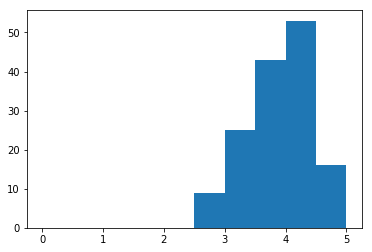

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'],range=(0,5))
plt.show()

# 5. Comparing histograms

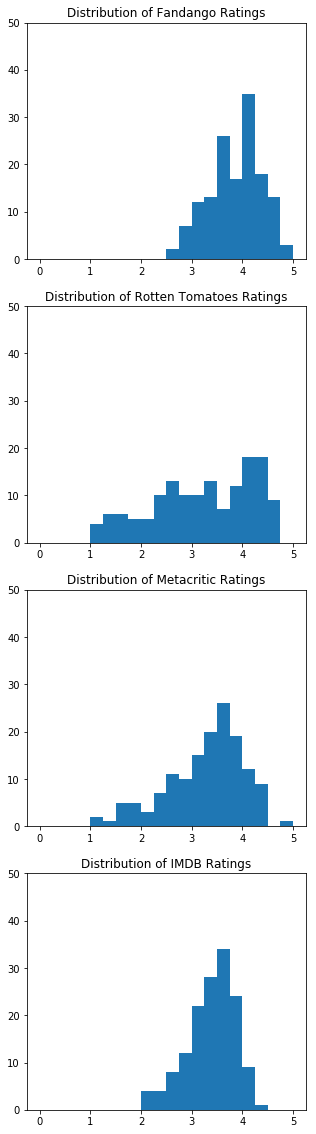

In [6]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

# 6. Quartiles

* From the histograms, we can make the following observations:

  * Around 50% of user ratings from Fandango fall in the 2 to 4 score range
  * Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range
  * Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range
  * Around 90% of the user ratings from IMDB fall in the 2 to 4 score range

* While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites.
* **The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.**

 To visualize quartiles, we need to use a box plot, also referred to as a [box-and-whisker plot](https://en.wikipedia.org/wiki/Box_plot).

# 7. Box Plot

`The two regions contained within the box in the middle make up the interquartile range, or IQR. The IQR is used to measure dispersion of the values.` The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.

We can generate a boxplot using `Axes.boxplot()`

## TODO:
* Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
* Generate a box plot from the values in the RT_user_norm column.
  * Set the y-axis limit to range from 0 to 5.
  * Set the x-axis tick label to Rotten Tomatoes.
* Use plt.show() to display the plot.

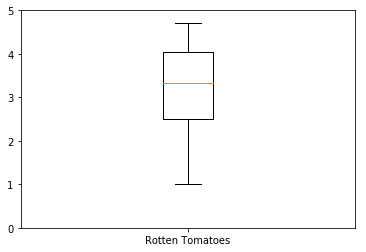

In [7]:
fig,ax=plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0,5)
plt.show()

# 8. Multiple Box Plots

* From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

  * the bottom 25% of user ratings range from around 1 to 2.5
  * the top 25% of of user ratings range from around 4 to 4.6

`To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot.` When selecting multiple columns to pass in to Axes.boxplot(), we need to use the values accessor to return a multi-dimensional numpy array:

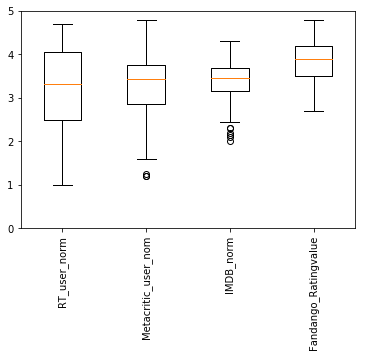

In [8]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig,ax=plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols,rotation=90)
ax.set_ylim(0,5)
plt.show()

From the boxplot, we can reach the following conclusions:

* user ratings from Rotten Tomatoes and Metacritic span a larger range of values
* user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values